In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import time
#import seaborn
# ./exp_vqa/data/imdb_r152_7x7_vqa_v2/imdb_v2_val2014.npy
# Loading imdb from ./exp_vqa/data/imdb_r152_7x7_vqa_v2/imdb_v2_val2014.npy
# Done
# evaluation outputs will be saved to ./exp_vqa/eval_outputs_vqa_v2/vqa_v2_scratch/vqa_v2_OpenEnded_mscoco_val2014_vqa_v2_scratch_40000_results.json

# snapshot file ./exp_vqa/tfmodel/vqa_v2_scratch/00040000

In [2]:
import json
file1 = './exp_vqa/eval_outputs_vqa_v2/vqa_v2_scratch/vqa_v2_OpenEnded_mscoco_val2014_vqa_v2_scratch_40000_results.json'
file2 = './exp_vqa/eval_outputs_vqa_v2/vqa_v2_scratch/vqa_v2_OpenEnded_mscoco_edited_val2014_vqa_v2_scratch_40000_results.json'
coco_json = './coco_cat_ids.json'
file1_npy = './exp_vqa/data/imdb_r152_7x7_vqa_v2/imdb_v2_val2014.npy' 
file2_npy = './exp_vqa/data/imdb_r152_7x7_vqa_v2/imdb_v2_edited_val2014.npy'



In [245]:
def my_read(results_json, standard_q_json, standard_a_json=None):
    with open(results_json) as file:
        results_details = json.load(file)
    with open(standard_q_json) as file:
        details_ques = json.load(file)['questions']


    q_ids = []
    pred_ans = []
    softmax_scores = []
    img_ids = []
    ques_str = []


    for idx, details in enumerate(results_details):
        q_ids.append(details['question_id'])
        pred_ans.append(details['answer'])
        softmax_scores.append(details['softmax_prob'])
        img_ids.append(details_ques[idx]['image_id'])                      
        ques_str.append(details_ques[idx]['question'])


    qid_ss_predans = {}     # idea: from using the first set: create a dictionary for val2014- that maps q_id to softmax_score, predicted_ans
    for idx, a in enumerate(q_ids):
        qid_ss_predans[a] = (softmax_scores[idx], pred_ans[idx])


    if standard_a_json is not None:  ### taking care if test split- as no answer file available for that

        all_answers = []
        most_freq_ans = []
        ques_type_data = []
        ans_type_data = []            

        with open(standard_a_json) as file:
            details_ann = json.load(file)['annotations']
        for idx, details in enumerate(results_details):    ## or enumerate(q_file) or (a_file)
            all_answers.append([ans['answer'] for i,ans in enumerate(details_ann[idx]['answers'])])          
            most_freq_ans.append(details_ann[idx]['multiple_choice_answer'])
            ques_type_data.append(details_ann[idx]['question_type'])
            ans_type_data.append(details_ann[idx]['answer_type'])
            matching_ans.append([item for item in all_answers[idx] if item == pred_ans[idx]] )
            ans_score.append(min(1, float(len(matching_ans[idx]))/3) 

        return q_ids, pred_ans, softmax_scores, qid_ss_predans, img_ids, ques_str, all_answers, most_freq_ans, ques_type_data, ans_type_data
    else:
        return q_ids, pred_ans, softmax_scores, qid_ss_predans, img_ids, ques_str, [], [], [], []

SyntaxError: invalid syntax (<ipython-input-245-5a5cc5f2ddda>, line 47)

In [44]:
def my_read(results_json, standard_q_json, standard_a_json=None):
    with open(results_json) as file:
        results_details = json.load(file)
    with open(standard_q_json) as file:
        details_ques = json.load(file)['questions']


    q_ids = []
    pred_ans = []
    softmax_scores = []
    img_ids = []
    ques_str = []


    for idx, details in enumerate(results_details):
        q_ids.append(details['question_id'])
        pred_ans.append(details['answer'])
        softmax_scores.append(details['softmax_prob'])
        img_ids.append(details_ques[idx]['image_id'])                      
        ques_str.append(details_ques[idx]['question'])


    qid_ss_predans = {}     # idea: from using the first set: create a dictionary for val2014- that maps q_id to softmax_score, predicted_ans
    for idx, a in enumerate(q_ids):
        qid_ss_predans[a] = (softmax_scores[idx], pred_ans[idx])


    if standard_a_json is not None:  ### taking care if test split- as no answer file available for that

        all_answers = []
        most_freq_ans = []
        ques_type_data = []
        ans_type_data = []            

        with open(standard_a_json) as file:
            details_ann = json.load(file)['annotations']
        for idx, details in enumerate(results_details):    ## or enumerate(q_file) or (a_file)
            all_answers.append([ans['answer'] for i,ans in enumerate(details_ann[idx]['answers'])])          
            most_freq_ans.append(details_ann[idx]['multiple_choice_answer'])
            ques_type_data.append(details_ann[idx]['question_type'])
            ans_type_data.append(details_ann[idx]['answer_type'])

        return q_ids, pred_ans, softmax_scores, qid_ss_predans, img_ids, ques_str, all_answers, most_freq_ans, ques_type_data, ans_type_data
    else:
        return q_ids, pred_ans, softmax_scores, qid_ss_predans, img_ids, ques_str, [], [], [], []

In [204]:
a[0]

{'image_name': 'COCO_val2014_000000262148_000000000067',
 'image_path': '/BS/vedika3/work/edited_snmn/snmn/exp_vqa/coco_dataset/images/val2014/COCO_val2014_000000262148_000000000067.jpg',
 'image_id': '000000262148_000000000067',
 'question_id': 262148000,
 'feature_path': '/BS/vedika3/work/edited_snmn/snmn/exp_vqa/data/resnet152_c5_7x7/val2014/COCO_val2014_000000262148_000000000067.npy',
 'question_str': 'Where is he looking?',
 'question_tokens': ['where', 'is', 'he', 'looking', '?'],
 'all_answers': ['down',
  'down',
  'at table',
  'skateboard',
  'down',
  'table',
  'down',
  'down',
  'down',
  'down'],
 'valid_answers': ['down',
  'down',
  'skateboard',
  'down',
  'table',
  'down',
  'down',
  'down',
  'down'],
 'soft_score_inds': [96, 37, 73],
 'soft_score_target': [1.0, 0.3333333333333333, 0.3333333333333333],
 'gt_layout_tokens': ['_Find', '_Find', '_And', '_Describe']}

In [215]:
details_ques[0]['image_id'][0:12]

'000000262148'

In [221]:
ind = 0

img_dir= '/BS/databases10/VQA_v2/Images/' +  TEST_SPLIT + '/'
edit_img_dir = '/BS/vedika2/work/thesis/final_edited_VQA_v2/Images/' + TEST_SPLIT + '/'
img_prefix_name = 'COCO_' + TEST_SPLIT + '_' 

#Showing images in opencv.
org_img = img_dir + img_prefix_name + img_ids_edit_val[ind][0:12] + '.jpg'
edit_img = edit_img_dir + img_prefix_name + img_ids_edit_val[ind] + '.jpg'

In [222]:
org_img

'/BS/databases10/VQA_v2/Images/val2014/COCO_val2014_000000262148.jpg'

In [223]:
edit_img

'/BS/vedika2/work/thesis/final_edited_VQA_v2/Images/val2014/COCO_val2014_000000262148_000000000067.jpg'

In [3]:
#mapping_coco_dictionary:
with open('coco_cat_ids.json') as file:
    f = json.load(file)
coco_dict = {}
for idx,details in enumerate(f):
    #print(details)
    coco_dict[details['id']] = details['name']   

In [5]:
a = np.load(file2_npy)
b = np.load(file1_npy)

In [12]:
TEST_SPLIT = 'val2014'

results_val_json = '/BS/vedika2/work/snmn/exp_vqa/eval_outputs_vqa_v2/vqa_v2_scratch/vqa_v2_OpenEnded_mscoco_' + TEST_SPLIT + '_vqa_v2_scratch_40000_results.json'
results_edited_val_json = '/BS/vedika2/work/snmn/exp_vqa/eval_outputs_vqa_v2/vqa_v2_scratch/vqa_v2_OpenEnded_mscoco_edited_' + TEST_SPLIT + '_vqa_v2_scratch_40000_results.json'



standard_questions_val_json = '/BS/databases10/VQA_v2/Questions/v2_OpenEnded_mscoco_'  + TEST_SPLIT + '_questions.json'
standard_questions_edited_val_json = '/BS/vedika2/work/thesis/final_edited_VQA_v2/Questions/v2_OpenEnded_mscoco_'  + TEST_SPLIT + '_questions.json'


standard_annotations_val_json = '/BS/databases10/VQA_v2/Annotations/v2_mscoco_'  + TEST_SPLIT + '_annotations.json'
standard_annotations_edited_val_json = '/BS/vedika2/work/thesis/final_edited_VQA_v2/Annotations/v2_mscoco_'  + TEST_SPLIT + '_annotations.json'

In [16]:
with open(results_val_json) as f:
    results_details = json.load(f)    

In [7]:
with open(standard_annotations_edited_val_json) as f:
    details_ann = json.load(f)['annotations']
    
with open(standard_questions_edited_val_json) as f:
    details_ques = json.load(f)['questions']    

In [ ]:
def my_read(results_json, standard_q_json, standard_a_json=None):
    with open(results_json) as file:
        results_details = json.load(file)
    with open(standard_q_json) as file:
        details_ques = json.load(file)['questions']


    q_ids = []
    pred_ans = []
    softmax_scores = []
    img_ids = []
    ques_str = []


    for idx, details in enumerate(results_details):
        q_ids.append(details['question_id'])
        pred_ans.append(details['answer'])
        softmax_scores.append(details['softmax_prob'])
        img_ids.append(details_ques[idx]['image_id'])                      
        ques_str.append(details_ques[idx]['question'])


    qid_ss_predans = {}     # idea: from using the first set: create a dictionary for val2014- that maps q_id to softmax_score, predicted_ans
    for idx, a in enumerate(q_ids):
        qid_ss_predans[a] = (softmax_scores[idx], pred_ans[idx])


    if standard_a_json is not None:  ### taking care if test split- as no answer file available for that

        all_answers = []
        most_freq_ans = []
        ques_type_data = []
        ans_type_data = []  
        matching_ans = []
        ans_score_list = []

        with open(standard_a_json) as file:
            details_ann = json.load(file)['annotations']
        for idx, details in enumerate(results_details):    ## or enumerate(q_file) or (a_file)
            all_answers.append([ans['answer'] for i,ans in enumerate(details_ann[idx]['answers'])])          
            most_freq_ans.append(details_ann[idx]['multiple_choice_answer'])
            ques_type_data.append(details_ann[idx]['question_type'])
            ans_type_data.append(details_ann[idx]['answer_type'])
            matching_ans.append([item for item in all_answers[idx] if item == pred_ans[idx]] )
            ans_score_list.append(min(1, float(len(matching_ans[idx]))/3))    ### acc = min(1, float(len(matching_ans))/3)
        return q_ids, pred_ans, softmax_scores, qid_ss_predans, img_ids, ques_str, all_answers, most_freq_ans, ques_type_data, ans_type_data, ans_score_list
    else:
        return q_ids, pred_ans, softmax_scores, qid_ss_predans, img_ids, ques_str, [], [], [], [], []

qid_val,pred_ans_val,soft_sc_val, qid_ss_predans_val, img_ids_val, ques_str_val, all_ans_val, most_freq_ans_val, ques_type_val, ans_type_val, ans_score_val = my_read(results_val_json,standard_questions_val_json,standard_annotations_val_json)
qid_edit_val,pred_ans_edit_val,soft_sc_edit_val, qid_ss_predans_edit_val, img_ids_edit_val, ques_str_edit_val, all_ans_edit_val, most_freq_ans_edit_val, ques_type_edit_val, ans_type_edit_val, ans_score_edit_val = my_read(results_edited_val_json,standard_questions_edited_val_json,standard_annotations_edited_val_json)

In [205]:
results_val = my_read(results_val_json,standard_questions_val_json,standard_annotations_val_json)
results_edit_val = my_read(results_edited_val_json,standard_questions_edited_val_json,standard_annotations_edited_val_json)

In [67]:
extended_pred_ans_val = [qid_ss_predans_val[q_id][1] for idx, q_id in enumerate(qid_edit_val)]
extended_ss_val = [qid_ss_predans_val[q_id][0] for idx, q_id in enumerate(qid_edit_val)]
diff_softmax = [soft_sc_edit_val[idx] - extended_ss_val[idx] for idx, q_id in enumerate(qid_edit_val)]

In [226]:
str(all_ans_edit_val[0])

"['down', 'down', 'at table', 'skateboard', 'down', 'table', 'down', 'down', 'down', 'down']"

In [70]:
def lists_diff_by_class_removed(class_id, image_ids_edit_val, dict_difference_softmax):  #class_id- 1 to 90
    # indices = []
    # for idx, i_id in enumerate(image_ids_edit_val):
    #     if int(i_id)%100 == class_id:       ### get the last two number of q_id
    #         indices.append(idx)

    # sorted_diff_list_check = []
    # #l2 = []
    # for i in indices:
    #     sorted_diff_list_check.append(dict_difference_softmax[i])
    #     #l2.append(diff_sft[i])

    indices = [i for i, i_id in enumerate(image_ids_edit_val) if int(i_id)%100 == class_id]
    sorted_diff_list = [dict_difference_softmax[i] for i in indices]
    print('number of IQA triplets related to object_id:', class_id, 'is', len(indices))
    return(indices, sorted_diff_list)   ### check if these are true or not

In [80]:
extended_pred_ans_val_2 = []
dict_diff_softmax = {}
for idx, q_id in enumerate(qid_edit_val):
    dict_diff_softmax[idx] = {soft_sc_edit_val[idx] - qid_ss_predans_val[q_id][0]}
    extended_pred_ans_val_2.append(qid_ss_predans_val[q_id][1])

In [81]:
extended_pred_ans_val_2 == extended_pred_ans_val

True

In [85]:
idx = 292
diff_softmax[idx]

-0.00019121170043945312

In [86]:
dict_diff_softmax[idx]

{-0.00019121170043945312}

In [100]:
CLASS_ID = 90
chosen_indices = [idx for idx, i_id in enumerate(img_ids_edit_val) if int(i_id)%100 == class_id]
chosen_diff_list = [diff_softmax[i] for i in chosen_indices]      ###[dict_diff_softmax[i] for i in indices]

In [101]:
chosen_diff_list2 = [dict_diff_softmax[i] for i in chosen_indices]

In [102]:
len(chosen_indices)

1588

In [177]:
def intersect(lst1, lst2): 
    if lst1:   ## if not empty
        return(list(set(lst1).intersection(set(lst2))))
    else:
        return lst2 

In [225]:
coco_dict[90]

'toothbrush'

In [200]:
CLASS_ID = 90
QUES_TYPE = None
ANS_TYPE = 'yes/no'

In [254]:
def vqa_score_list(all_answers, pred_ans):
    matching_ans = []
    ans_score_list = []
    for idx in range(len(pred_ans)):
        matching_ans.append([item for item in all_answers[idx] if item == pred_ans[idx]] )
        ans_score_list.append(min(1, float(len(matching_ans[idx]))/3))    ### acc = min(1, float(len(matching_ans))/3)
    return ans_score_list

In [258]:
check = vqa_score_list(all_ans_val, pred_ans_val)
ans_score_val == check

In [261]:
vqa_score_val = {}     # idea: from using the first set: create a dictionary for val2014- that maps q_id to softmax_score, predicted_ans
for idx, a in enumerate(qid_val):
    vqa_score_val[a] = ans_score_val[idx]
extended_ans_score_val = [vqa_score_val[q_id] for idx, q_id in enumerate(qid_edit_val)]

In [ ]:
CLASS_ID = 90
QUES_TYPE = None
ANS_TYPE = None

In [268]:
chosen_indices_id = []
chosen_indices_q  = []
chosen_indices_a  = []
common_indices = []
if CLASS_ID is not None :
    chosen_indices_id = [i for i, i_id in enumerate(img_ids_edit_val) if int(i_id)%100 == CLASS_ID]
    common_indices = chosen_indices_id    
    print('number of IQA triplets related to removed object:', coco_dict[CLASS_ID], 'is', len(chosen_indices_id))

if QUES_TYPE is not None:
    chosen_indices_q = [i for i, s in enumerate(ques_type_edit_val) if s == QUES_TYPE]
    print('number of IQA triplets related to question_type:', QUES_TYPE , 'is', len(chosen_indices_q))
    common_indices = intersect(chosen_indices_id, chosen_indices_q)

if ANS_TYPE is not None:
    chosen_indices_a = [i for i, s in enumerate(ans_type_edit_val) if s == ANS_TYPE]
    print('number of IQA triplets related to answer type:', ANS_TYPE , 'is', len(chosen_indices_a))
    common_indices = intersect(common_indices, chosen_indices_a)

print('number of IQA triplets in common:', len(common_indices))
chosen_diff_list = [diff_softmax[i] for i in common_indices] 

number of IQA triplets related to removed object: toothbrush is 1588
number of IQA triplets related to answer type: yes/no is 199200
number of IQA triplets in common: 665


In [298]:
d_non_zero_indices[0]

61472

In [299]:
extended_ans_score_val[61472]

0.0

In [300]:
ans_score_edit_val[61472]

1

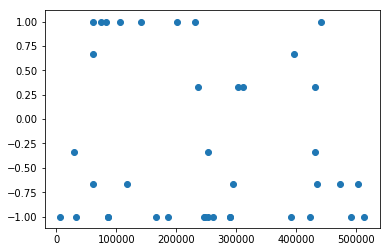

number of substantial points that have a non-zero vqa_score_difference= 39


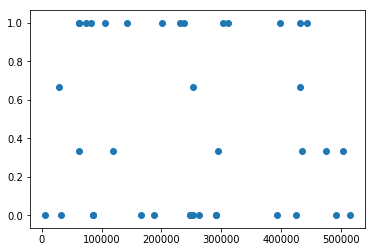

nature of points after editing, number of points= 39


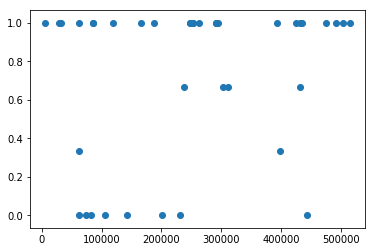

nature of points before editing, number of points= 39


In [305]:
chosen_indices = common_indices
vqa_score_list_before_editing = [extended_ans_score_val[i] for i in chosen_indices]   ## 1 = true, 0 = false
vqa_score_list_after_editing = [ans_score_edit_val[i] for i in chosen_indices]

# ##two lists of comparisons:extended_ans_score_val; ans_score_edit_valt
# ## sample figure
# fig = plt.figure();
# ax = plt.subplot();
# cax = ax.scatter(chosen_indices, chosen_diff_list)
# plt.show() 

# fig = plt.figure();
# ax = plt.subplot();
# cax = ax.scatter(chosen_indices, vqa_score_list_before_editing)
# plt.show()            #### ans 1,0.66,0.33,0


# fig = plt.figure();
# ax = plt.subplot();
# cax = ax.scatter(chosen_indices, vqa_score_list_after_editing)
# plt.show() 

diff_vqa_score_list_after_before = [ans_score_edit_val[i] - extended_ans_score_val[i] for i in chosen_indices]

d_non_zero = [i for i in diff_vqa_score_list_after_before if i!= 0]
d_non_zero_indices = [ i for idx, i in enumerate(chosen_indices) if diff_vqa_score_list_after_before[idx]!= 0]
d_nz_before = [extended_ans_score_val[i] for i in d_non_zero_indices]
d_nz_after = [ans_score_edit_val[i] for i in d_non_zero_indices]

# d_nz_indices = []
# d_nz_before = []
# d_nz_after = []
# for idx, i in enumerate(chosen_indices):
#     if diff_vqa_score_list_after_before[idx]!= 0:
#         d_nz_indices.append(i)
#         d_nz_before.append(extended_ans_score_val[i])
#         d_nz_after.append(ans_score_edit_val[i])

# ## visulaize the difference- so for which there is a diff in score
# fig = plt.figure();
# ax = plt.subplot();
# cax = ax.scatter(chosen_indices,diff_vqa_score_list_after_before)
# plt.show() 

fig = plt.figure();
ax = plt.subplot();
cax = ax.scatter(d_non_zero_indices , d_non_zero)
plt.show() 
print('number of substantial points that have a non-zero vqa_score_difference=', len(d_non_zero))

fig = plt.figure();
ax = plt.subplot();
cax = ax.scatter(d_non_zero_indices , d_nz_after)
plt.show() 
print('nature of points after editing, number of points=', len(d_nz_after))

fig = plt.figure();
ax = plt.subplot();
cax = ax.scatter(d_non_zero_indices , d_nz_before)
plt.show() 
print('nature of points before editing, number of points=', len(d_nz_before))

In [318]:
for i in range(len(d_nz_before)):
    print (round(d_nz_before[i],2), '-------------------' , round(d_nz_after[i],2))

0.0 ------------------- 1
0.33 ------------------- 1
1 ------------------- 0.0
1 ------------------- 0.33
0.33 ------------------- 1
1 ------------------- 0.0
1 ------------------- 0.0
1 ------------------- 0.33
0.0 ------------------- 1
0.0 ------------------- 1
1 ------------------- 0.0
1 ------------------- 0.33
0.0 ------------------- 1
0.67 ------------------- 1
0.0 ------------------- 1
1 ------------------- 0.0
1 ------------------- 0.0
1 ------------------- 0.67
1 ------------------- 0.33
1 ------------------- 0.67
0.0 ------------------- 1
1 ------------------- 0.33
0.0 ------------------- 1
1 ------------------- 0.0
1 ------------------- 0.0
0.67 ------------------- 1
1 ------------------- 0.67
1 ------------------- 0.0
1 ------------------- 0.0
1 ------------------- 0.0
0.67 ------------------- 1
1 ------------------- 0.0
1 ------------------- 0.0
1 ------------------- 0.0
0.67 ------------------- 1
0.0 ------------------- 1
1 ------------------- 0.0
1 ------------------- 0.